In [4]:
import nltk
import svgling
from svgling.figure import Caption, SideBySide

# Metalanguage and simple types

#### NASSLLI 2022: implementing semantic compositionality
#### Kyle Rawlins, [kgr@jhu.edu](mailto:kgr@jhu.edu)
#### Johns Hopkins University, Department of Cognitive Science

Goals for today:
 * Look at some more interesting examples
 * Look in more detail at the metalanguage implementation
 * Type inference in simple types

## Composition systems, recap

What is an implemented composition system?


1. A set of composition operations
    1. Python: implemented via a python function that constructs a new metalanguage object given some input(s)
    2. Combinator: implemented via a metalanguage combinator
2. A set of classes that describe object language $\Leftrightarrow$ meta-language mappings, abstracted as `Composable`s
2. A set of functions that given some `Composable`s, does a (brute-force) search over possible valid combinations
2. And, of course, the metalanguage itself

### The combinator trick

**Many** composition operations that have been proposed in the literature can be represented as [combinators](https://github.com/loophp/combinator).

The initial core Heim & Kratzer system is essentially the system determined by:

1. **FA**: $\lambda f . \lambda x . f(x)$ (also called the **A** combinator)
2. **NN**: $\lambda x . x$ (also called the **I** combinator)
3. **PM**: $\lambda f_{\langle e,t \rangle} . \lambda g_{\langle e,t \rangle} . \lambda x_e . f(x) \wedge g(x)$

(However -- types for the first two!)

## A more interesting example to play with

Switch to notebook for this:

In [59]:
%%lamb
||cat|| = L x_e: Cat(x)
||gray|| = L x_e: Gray(x)
||kaline|| = Kaline_e
||julius|| = Julius_e
||inP|| = L x_e : L y_e : In(y, x) # `in` is a reserved word in python
||texas|| = Texas_e
||isV|| = L p_<e,t> : p # `is` is a reserved word in python
||fond|| = L x_e : L y_e : Fond(y, x)

INFO (meta): Coerced guessed type for 'Cat_t' into <e,t>, to match argument 'x_e'
INFO (meta): Coerced guessed type for 'Gray_t' into <e,t>, to match argument 'x_e'
INFO (meta): Coerced guessed type for 'In_t' into <(e,e),t>, to match argument '(y_e, x_e)'
INFO (meta): Coerced guessed type for 'Fond_t' into <(e,e),t>, to match argument '(y_e, x_e)'


$[\![\mathbf{\text{cat}}]\!]^{}_{\left\langle{}e,t\right\rangle{}} \:=\: $$\lambda{} x_{e} \: . \: {Cat}({x})$<br />
$[\![\mathbf{\text{gray}}]\!]^{}_{\left\langle{}e,t\right\rangle{}} \:=\: $$\lambda{} x_{e} \: . \: {Gray}({x})$<br />
$[\![\mathbf{\text{kaline}}]\!]^{}_{e} \:=\: $${Kaline}_{e}$<br />
$[\![\mathbf{\text{julius}}]\!]^{}_{e} \:=\: $${Julius}_{e}$<br />
$[\![\mathbf{\text{inP}}]\!]^{}_{\left\langle{}e,\left\langle{}e,t\right\rangle{}\right\rangle{}} \:=\: $$\lambda{} x_{e} \: . \: \lambda{} y_{e} \: . \: {In}({y}, {x})$<br />
$[\![\mathbf{\text{texas}}]\!]^{}_{e} \:=\: $${Texas}_{e}$<br />
$[\![\mathbf{\text{isV}}]\!]^{}_{\left\langle{}\left\langle{}e,t\right\rangle{},\left\langle{}e,t\right\rangle{}\right\rangle{}} \:=\: $$\lambda{} p_{\left\langle{}e,t\right\rangle{}} \: . \: {p}$<br />
$[\![\mathbf{\text{fond}}]\!]^{}_{\left\langle{}e,\left\langle{}e,t\right\rangle{}\right\rangle{}} \:=\: $$\lambda{} x_{e} \: . \: \lambda{} y_{e} \: . \: {Fond}({y}, {x})$

In [60]:
of = lang.Item("of", content=None)
a = lang.Item("a", content=None)
binder = lang.Binder(5)
t5 = lang.Trace(5)

display(of, a, binder, t5)

In [61]:
kaline * (isV * (a * (gray * cat)))

CompositionResult(results=[⟦[[isV [a [gray cat]]] kaline]⟧ = (Gray_<e,t>(Kaline_e) & Cat_<e,t>(Kaline_e))], failures=[⟦[kaline [isV [a [gray cat]]]]⟧ = Type mismatch: '⟦kaline⟧ = Kaline_e'/e and '⟦[isV [a [gray cat]]]⟧ = (λ x_e: (Gray_<e,t>(x_e) & Cat_<e,t>(x_e)))'/<e,t> conflict (Function Application), ⟦[kaline [isV [a [gray cat]]]]⟧ = Type mismatch: '⟦kaline⟧ = Kaline_e'/e and '⟦[isV [a [gray cat]]]⟧ = (λ x_e: (Gray_<e,t>(x_e) & Cat_<e,t>(x_e)))'/<e,t> conflict (Predicate Modification), ⟦[kaline [isV [a [gray cat]]]]⟧ = Composition failure (PA requires a valid binder) on: ⟦kaline⟧ = Kaline_e * ⟦[isV [a [gray cat]]]⟧ = (λ x_e: (Gray_<e,t>(x_e) & Cat_<e,t>(x_e))), ⟦[[isV [a [gray cat]]] kaline]⟧ = Composition failure (PA requires a valid binder) on: ⟦[isV [a [gray cat]]]⟧ = (λ x_e: (Gray_<e,t>(x_e) & Cat_<e,t>(x_e))) * ⟦kaline⟧ = Kaline_e, ⟦[kaline [isV [a [gray cat]]]]⟧ = Type mismatch: '⟦kaline⟧ = Kaline_e'/e and '⟦[isV [a [gray cat]]]⟧ = (λ x_e: (Gray_<e,t>(x_e) & Cat_<e,t>(x_e)))'/<e,t> conflict (Need at least one fully vacuous element)])

In [62]:
kaline * (isV * ((a * (gray * cat)) * (inP * texas)))

CompositionResult(results=[⟦[[isV [[a [gray cat]] [inP texas]]] kaline]⟧ = ((Gray_<e,t>(Kaline_e) & Cat_<e,t>(Kaline_e)) & In_<(e,e),t>(Kaline_e, Texas_e))], failures=[⟦[kaline [isV [[a [gray cat]] [inP texas]]]]⟧ = Type mismatch: '⟦kaline⟧ = Kaline_e'/e and '⟦[isV [[a [gray cat]] [inP texas]]]⟧ = (λ x_e: ((Gray_<e,t>(x_e) & Cat_<e,t>(x_e)) & In_<(e,e),t>(x_e, Texas_e)))'/<e,t> conflict (Function Application), ⟦[kaline [isV [[a [gray cat]] [inP texas]]]]⟧ = Type mismatch: '⟦kaline⟧ = Kaline_e'/e and '⟦[isV [[a [gray cat]] [inP texas]]]⟧ = (λ x_e: ((Gray_<e,t>(x_e) & Cat_<e,t>(x_e)) & In_<(e,e),t>(x_e, Texas_e)))'/<e,t> conflict (Predicate Modification), ⟦[kaline [isV [[a [gray cat]] [inP texas]]]]⟧ = Composition failure (PA requires a valid binder) on: ⟦kaline⟧ = Kaline_e * ⟦[isV [[a [gray cat]] [inP texas]]]⟧ = (λ x_e: ((Gray_<e,t>(x_e) & Cat_<e,t>(x_e)) & In_<(e,e),t>(x_e, Texas_e))), ⟦[[isV [[a [gray cat]] [inP texas]]] kaline]⟧ = Composition failure (PA requires a valid binder) on: ⟦[isV [[a [gray cat]] [inP texas]]]⟧ = (λ x_e: ((Gray_<e,t>(x_e) & Cat_<e,t>(x_e)) & In_<(e,e),t>(x_e, Texas_e))) * ⟦kaline⟧ = Kaline_e, ⟦[kaline [isV [[a [gray cat]] [inP texas]]]]⟧ = Type mismatch: '⟦kaline⟧ = Kaline_e'/e and '⟦[isV [[a [gray cat]] [inP texas]]]⟧ = (λ x_e: ((Gray_<e,t>(x_e) & Cat_<e,t>(x_e)) & In_<(e,e),t>(x_e, Texas_e)))'/<e,t> conflict (Need at least one fully vacuous element)])

In [63]:
kaline * (isV * (a * ((gray * cat) * (inP * texas)
                       * (binder * (t5 * (fond * (of * julius)))))))

CompositionResult(results=[⟦[[isV [a [[[gray cat] [inP texas]] [5 [[fond [of julius]] t5]]]]] kaline]⟧ = (((Gray_<e,t>(Kaline_e) & Cat_<e,t>(Kaline_e)) & In_<(e,e),t>(Kaline_e, Texas_e)) & Fond_<(e,e),t>(Kaline_e, Julius_e))], failures=[⟦[kaline [isV [a [[[gray cat] [inP texas]] [5 [[fond [of julius]] t5]]]]]]⟧ = Type mismatch: '⟦kaline⟧ = Kaline_e'/e and '⟦[isV [a [[[gray cat] [inP texas]] [5 [[fond [of julius]] t5]]]]]⟧ = (λ x_e: (((Gray_<e,t>(x_e) & Cat_<e,t>(x_e)) & In_<(e,e),t>(x_e, Texas_e)) & Fond_<(e,e),t>(x_e, Julius_e)))'/<e,t> conflict (Function Application), ⟦[kaline [isV [a [[[gray cat] [inP texas]] [5 [[fond [of julius]] t5]]]]]]⟧ = Type mismatch: '⟦kaline⟧ = Kaline_e'/e and '⟦[isV [a [[[gray cat] [inP texas]] [5 [[fond [of julius]] t5]]]]]⟧ = (λ x_e: (((Gray_<e,t>(x_e) & Cat_<e,t>(x_e)) & In_<(e,e),t>(x_e, Texas_e)) & Fond_<(e,e),t>(x_e, Julius_e)))'/<e,t> conflict (Predicate Modification), ⟦[kaline [isV [a [[[gray cat] [inP texas]] [5 [[fond [of julius]] t5]]]]]]⟧ = Composition failure (PA requires a valid binder) on: ⟦kaline⟧ = Kaline_e * ⟦[isV [a [[[gray cat] [inP texas]] [5 [[fond [of julius]] t5]]]]]⟧ = (λ x_e: (((Gray_<e,t>(x_e) & Cat_<e,t>(x_e)) & In_<(e,e),t>(x_e, Texas_e)) & Fond_<(e,e),t>(x_e, Julius_e))), ⟦[[isV [a [[[gray cat] [inP texas]] [5 [[fond [of julius]] t5]]]]] kaline]⟧ = Composition failure (PA requires a valid binder) on: ⟦[isV [a [[[gray cat] [inP texas]] [5 [[fond [of julius]] t5]]]]]⟧ = (λ x_e: (((Gray_<e,t>(x_e) & Cat_<e,t>(x_e)) & In_<(e,e),t>(x_e, Texas_e)) & Fond_<(e,e),t>(x_e, Julius_e))) * ⟦kaline⟧ = Kaline_e, ⟦[kaline [isV [a [[[gray cat] [inP texas]] [5 [[fond [of julius]] t5]]]]]]⟧ = Type mismatch: '⟦kaline⟧ = Kaline_e'/e and '⟦[isV [a [[[gray cat] [inP texas]] [5 [[fond [of julius]] t5]]]]]⟧ = (λ x_e: (((Gray_<e,t>(x_e) & Cat_<e,t>(x_e)) & In_<(e,e),t>(x_e, Texas_e)) & Fond_<(e,e),t>(x_e, Julius_e)))'/<e,t> conflict (Need at least one fully vacuous element)])

## Another example

Depending on time, let's look at the Neo-Davidsonian fragment

## Metalanguage objects

All metalanguage objects are subclasses of class `TypedExpr`. Subclasses add on:
* Syntactic information: name of expression, part structure
* Behaviors: type constraints, reduction / simplification code
* Rendering information (infix/prefix, mathjax)

There are essentially three main kinds of metalanguage objects: terms, operators, and binding operators. Functions are a special case of binding operators.

### A quick note on terms

Terms come in two kinds: variables and constants.
* Only variables can be bound.
* Convention (prolog-ish): variables are lowercase, constants are uppercase.

### Introspection on metalanguage objects

We looked yesterday at an example like this:

In [28]:
formula = %te p_t & (q_t | ~r_t)
formula

(p_t & (q_t | ~r_t))

In [29]:
display(formula.op) # typed expressions (may) have an operator
display(formula.type) # typed expressions have a type
display(list(formula)) # typed expressions have parts
display(formula.__class__) # the python type of `formula`

'&'

t

[p_t, (q_t | ~r_t)]

lamb.meta.BinaryAndExpr

Let's look at a part:

In [34]:
formula[0]

p_t

In [37]:
display(formula[0].op) # Terms put the variable name in the `op` field
display(formula[0].type)
display(len(formula[0])) # no parts
display(formula[0].__class__)

'p'

t

0

lamb.meta.TypedTerm

### Abstract Syntax Trees (ASTs)

Concept from programming language design: an AST is a representation of the abstract syntactic structure of a formal language.

In [26]:
def collect_ast(x):
    result = [x.op] + [collect_ast(sub) for sub in list(x)]
    if (len(result) > 1):
        result = [""] + result
    return result

(p_t & (q_t | ~r_t))

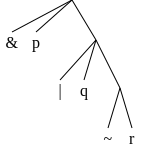

In [44]:
display(formula)
svgling.draw_tree(collect_ast(formula))

INFO (meta): Coerced guessed type for 'P_t' into <e,t>, to match argument 'x_e'
INFO (meta): Coerced guessed type for 'Q_t' into <e,t>, to match argument 'x_e'


(λ x_e: (λ y_e: (P_<e,t>(x_e) & Q_<e,t>(x_e))))

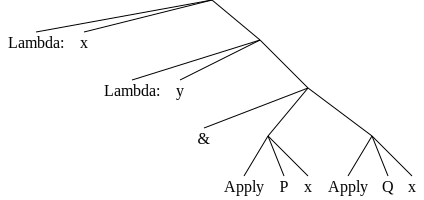

In [42]:
f2 = %te L x_e : L y_e : P(x) & Q(x)
display(f2)
svgling.draw_tree(collect_ast(f2))

(λ x_e: (Forall y_e: (y_e <=> x_e)))

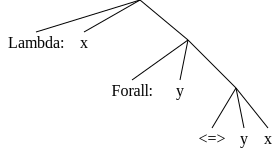

In [43]:
f3 = %te L x_e : Forall y_e : y <=> x
display(f3)
svgling.draw_tree(collect_ast(f3))

Some basic logical inference, nothing sophisticated (contributions welcome!):

### Behaviors

* Complex formula-building
* Reduction
* Type inference / consistency
* Simplification (rudimentary)

More simplification/reduction examples:

In [62]:
f4 = %te True & False
f4.simplify()

False_t

In [66]:
f5 = %te x << (Set y: Cat(y))
f5

INFO (meta): Coerced guessed type for 'Cat_t' into <e,t>, to match argument 'y_e'


(x_e << (Set y_e: Cat_<e,t>(y_e)))

In [68]:
f5.reduce()

Cat_<e,t>(x_e)

## Type inference part 1

The most involved part of the metalanguage implementation is type inference. Plan for discussing:

1. Some lambda calculus theory
2. Implementing simple type inference
3. Unification

On Thursday, we will revisit this topic, and talk about polymorphic type inference.

### A bit more on the lambda calculus

Useful references
* Carpenter 1998, [Type-logical semantics](https://mitpress.mit.edu/books/type-logical-semantics)
* [SEP entry](https://plato.stanford.edu/entries/lambda-calculus/) on the lambda calculus

Desiderata for implementation:
* Reduction is guaranteed to converge on a single result (**strong normalization**)
* Efficient reduction strategies
* Working with formulas involves decidable problems.

(I won't discuss the latter, but just to tantalize you: in the untyped lambda calculus, it is *undecidable* whether two lambda expressions are equivalent -- arguably the first undecidable problem, discovered by Church.)

An example (untyped): $\lambda x . x(x)$

Reduction 1 (converges):
1. $(\lambda x . x(x))(\lambda x . x)$
2. $(\lambda x . x)(\lambda x . x)$
3. $\lambda x . x$

ok...

Reduction 2 (does not converge):

1. $(\lambda x . x(x))(\lambda x . x(x))$
2. $(\lambda x . x(x))(\lambda x . x(x))$
3. ...

The untyped lambda calculus is not strongly normalizing. No guarantee that reduction will converge at all!

#### Simple types, again

1. Let $\mathbf{BasType}$ be a non-empty set of basic types.  (E.g. $\{e,t\}$)
2. If $\sigma \in \mathbf{BasType}$, then $\sigma \in \mathbf{Typ}$.
3. If $\sigma, \tau \in \mathbf{Typ}$, then $\langle \sigma, \tau \rangle \in \mathbf{Typ}$.
4. Nothing else is a type.

#### Lambda calculus: syntax (Carpenter version)

1. For any symbol $v$ where $v$ is $x,y,z$ with an arbitrary number of primes, and type $\tau$, $v_\tau \in \mathbf{Var}_\tau$.
2. Let $Var = \bigcup_{\tau \in \mathbf{Typ}} Var_\tau$ 
3. For any $\tau$, $\mathbf{Var}_\tau \subseteq \mathbf{Term}_\tau$.  (Countably infinite.)
4. For any $\tau$, $\mathbf{Con}_\tau \subseteq \mathbf{Term}_\tau$.  (Assume $\mathbf{Var}$ and $\mathbf{Con}$ are disjoint.)
5. If $\alpha$ is a term of type $\sigma$, and $v_\tau$ a variable, then $\lambda v_\tau . (\alpha)$ is a term of type $\langle \tau,\sigma \rangle$.
6. If $\alpha$ is a term of type $\langle \sigma,\tau \rangle$, and $\beta$ is a term of type $\sigma$, then $(\alpha(\beta))$ is a term of type $\tau$.
7. Nothing else is a term.


#### Lambda calculus inference as rewrite rules

**$\alpha$-reduction**: $\lambda v_\tau . \alpha \Rightarrow_\alpha \lambda v'_\tau \alpha{}[v_\tau := v'_\tau]$

  if $v'_\tau$ is not free in $\alpha$, and $v'_\tau$ is free for substitution for $v_\tau$ in $\alpha$.

**$\beta$-reduction**: $(\lambda v_\tau . \alpha)(\beta) \Rightarrow_\beta \alpha{}[v_\tau := \beta]$

if $\beta$ is free for substitution for $v_\tau$ in $\alpha$ and $\beta \in \mathbf{Term}_\tau$.

#### Strong normalization

1. A **$\beta$-redex** is a subterm of the form: $(\lambda v . \alpha)(\beta)$ for $\alpha,\beta \in \mathbf{Term}$
2. A term is in **$\beta$-normal form** if it contains no $\beta$-redexes.
3. A term **has a $\beta$-normal form** if there is a (finite) rewrite path to a $\beta$-normal form.

**Strong normalization**: a lambda calculus (viewed as a rewrite system) is strongly normalizing if every term has a $\beta$-normal form.

#### Church-Rosser theorem

If $\alpha \Rightarrow \beta$ and $\alpha \Rightarrow \gamma$, then there is some $\delta$ such that $\beta \Rightarrow \delta$ and $\gamma \Rightarrow \delta$.

* Intuition: order of application doesn't matter!
* If normalizing is possible, there is at most one normal form.

#### Strong normalization and simple types

All this to say:
* We want to be working with a type system that allows for strong normalization.
* Simply typed lambda calculus is a very straightforward system that is provably strongly normalizing.

### Type checking for function-argument combinations

Back to the Carpenter definition: If $\alpha$ is a term of type $\langle \sigma,\tau \rangle$, and $\beta$ is a term of type $\sigma$, then $(\alpha(\beta))$ is a term of type $\tau$

Implementation looks pretty straightforward. Given some `LFun` `f` and `TypedExpr` a:
1. If `f.type[0] == a.type`, then return `ApplicationExpr(f, a)` (of type `f.type[1]`)
2. Otherwise, raise a `TypeMismatchError`

#### Constructing functions

Important detail: we also need to ensure that variables are used consistently!

In [53]:
%te L x_t : P_<e,t>(x_e)

ERROR (parsing): Parsing of typed expression failed with exception:
ERROR (parsing): Binding operator expression has unparsable body, in string 'L x_t : P_<e,t>(x_e)' (Type mismatch: 'x_e'/e and type t conflict (Failed to unify types across distinct instances of term))


In [55]:
%te p_t & Q_<e,t>(p_e)

ERROR (parsing): Parsing of typed expression failed with exception:
ERROR (parsing): Type mismatch: 'p_t'/t and type e conflict (Failed to unify types across distinct instances of term)


#### Type checking and type inference

**Type inference**: given two types $a,b$, what (if any) single type $c$ is equivalent to $a$ and $b$?
* Combining $a$ and $b$ in this way is sometimes referred to as **type unification**.

In the simply-typed lambda calculus, *type inference* is the same thing as *type checking*. If $a$ and $b$ are equal, they can be unified as $a$ (or $b$), otherwise, they cannot be unified.


### Term unification

Given two terms $t1_\alpha$ and $t2_\beta$, a unification is a valid substitution that produces a single $t3_\gamma$ that is equivalent to $t1$ and $t_2$.

**Reduction as unification**: reduction involves unifying a variable of some type $\alpha$ (indicated by the $\lambda$ term) with an argument of some type $\beta$, and substituting the result for the variable in the scope of the lambda term

In [60]:
%te (L x_e : Cat_<e,t>(x))(Joanna_e)

((λ x_e: Cat_<e,t>(x_e)))(Joanna_e)

In [58]:
%te (L f_<e,t> : Forall x_e : f(x))(L x_e : Cat_<e,t>(x))

((λ f_<e,t>: (Forall x_e: f_<e,t>(x_e))))((λ x_e: Cat_<e,t>(x_e)))

## Recap: day 3

1. Two more fleshed-out compositional examples: core Heim & Kratzer, a neo-Davidsonian fragment
2. More on the metalanguage implementation
3. Type checking, inference, unification


## Exercises?

1. Translate some lambda calculus formulas to metalanguage objects with `%te`
    1. $\lambda x_e . Gray(x) \wedge Cat(x)$
    2. $\lambda y_e . \lambda x_e . x = y$
    3. $\lambda f_{\langle e,t \rangle} . \exists y . Human(y) \wedge f(y)$
    4. $\lambda f_{\langle e,t \rangle} . \lambda g_{\langle e,t \rangle} . \neg \exists x_e : f(x) \wedge g(x)$
    
2. Combinations:
    1. Use metalanguage function-argument combination to combine 1 with 3 and 4, and reduce.
    2. Produce a type error by trying to combine 2 with one of the others.
    3. Saturate 2 with a type $e$ term, and then use the result to combine with 3 and 4.

3. Translate a formula from your work to the metalanguage (if it can handle it!)
